In [0]:
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')

import sys
!{sys.executable} -m pip install neupy


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Loading data

In [0]:
import pandas as pd

pd.set_option('display.max_columns', None)

# df = pd.read_csv("/content/drive/My Drive/AI/MOW/UFC_fight_predictions/ufc_data/data.csv")
df = pd.read_csv("/content/drive/My Drive/mow/data.csv")


Data type

In [0]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5144 entries, 0 to 5143
Data columns (total 145 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   R_fighter                     object 
 1   B_fighter                     object 
 2   Referee                       object 
 3   date                          object 
 4   location                      object 
 5   Winner                        object 
 6   title_bout                    bool   
 7   weight_class                  object 
 8   no_of_rounds                  int64  
 9   B_current_lose_streak         float64
 10  B_current_win_streak          float64
 11  B_draw                        float64
 12  B_avg_BODY_att                float64
 13  B_avg_BODY_landed             float64
 14  B_avg_CLINCH_att              float64
 15  B_avg_CLINCH_landed           float64
 16  B_avg_DISTANCE_att            float64
 17  B_avg_DISTANCE_landed         float64
 18  B_avg_GROUND_att           

Static data analyze

In [0]:
df.describe()

,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_KD,B_avg_LEG_att,B_avg_LEG_landed,B_avg_PASS,B_avg_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_att,B_avg_TD_landed,B_avg_TD_pct,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_longest_win_streak,B_losses,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_opp_KD,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_opp_PASS,B_avg_opp_REV,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_opp_SIG_STR_pct,B_avg_opp_SUB_ATT,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_opp_TD_pct,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_total_rounds_fought,B_total_time_fought(seconds),B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_BODY_att,R_avg_BODY_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_KD,R_avg_LEG_att,R_avg_LEG_landed,R_avg_PASS,R_avg_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_att,R_avg_TD_landed,R_avg_TD_pct,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_longest_win_streak,R_losses,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_opp_KD,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_opp_PASS,R_avg_opp_REV,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_opp_SIG_STR_pct,R_avg_opp_SUB_ATT,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_opp_TD_pct,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_total_rounds_fought,R_total_time_fought(seconds),R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
count,5144.000000,5144.000000,5144.000000,5144.0,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,5144.000000,5144.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,5144.000000,3879.000000,5144.000000,5144.000000,5144.000000,5144.000000,5144.000000,5144.000000,5144.000000,5144.000000,5136.000000,4478.000000,5138.000000,5144.000000,5144.000000,5144.0,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,5144.000000,5144.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,5144.000000,4494.000000,5144.000000,5144.000000,5144.000000,5144.000000,51

Amount of data nulls

In [0]:
df.isnull().sum()

R_fighter         0
B_fighter         0
Referee          23
date              0
location          0
               ... 
R_Height_cms      4
R_Reach_cms     316
R_Weight_lbs      3
B_age           172
R_age            64
Length: 145, dtype: int64

Histogram plots

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1e64b36470>],
      dtype=object)

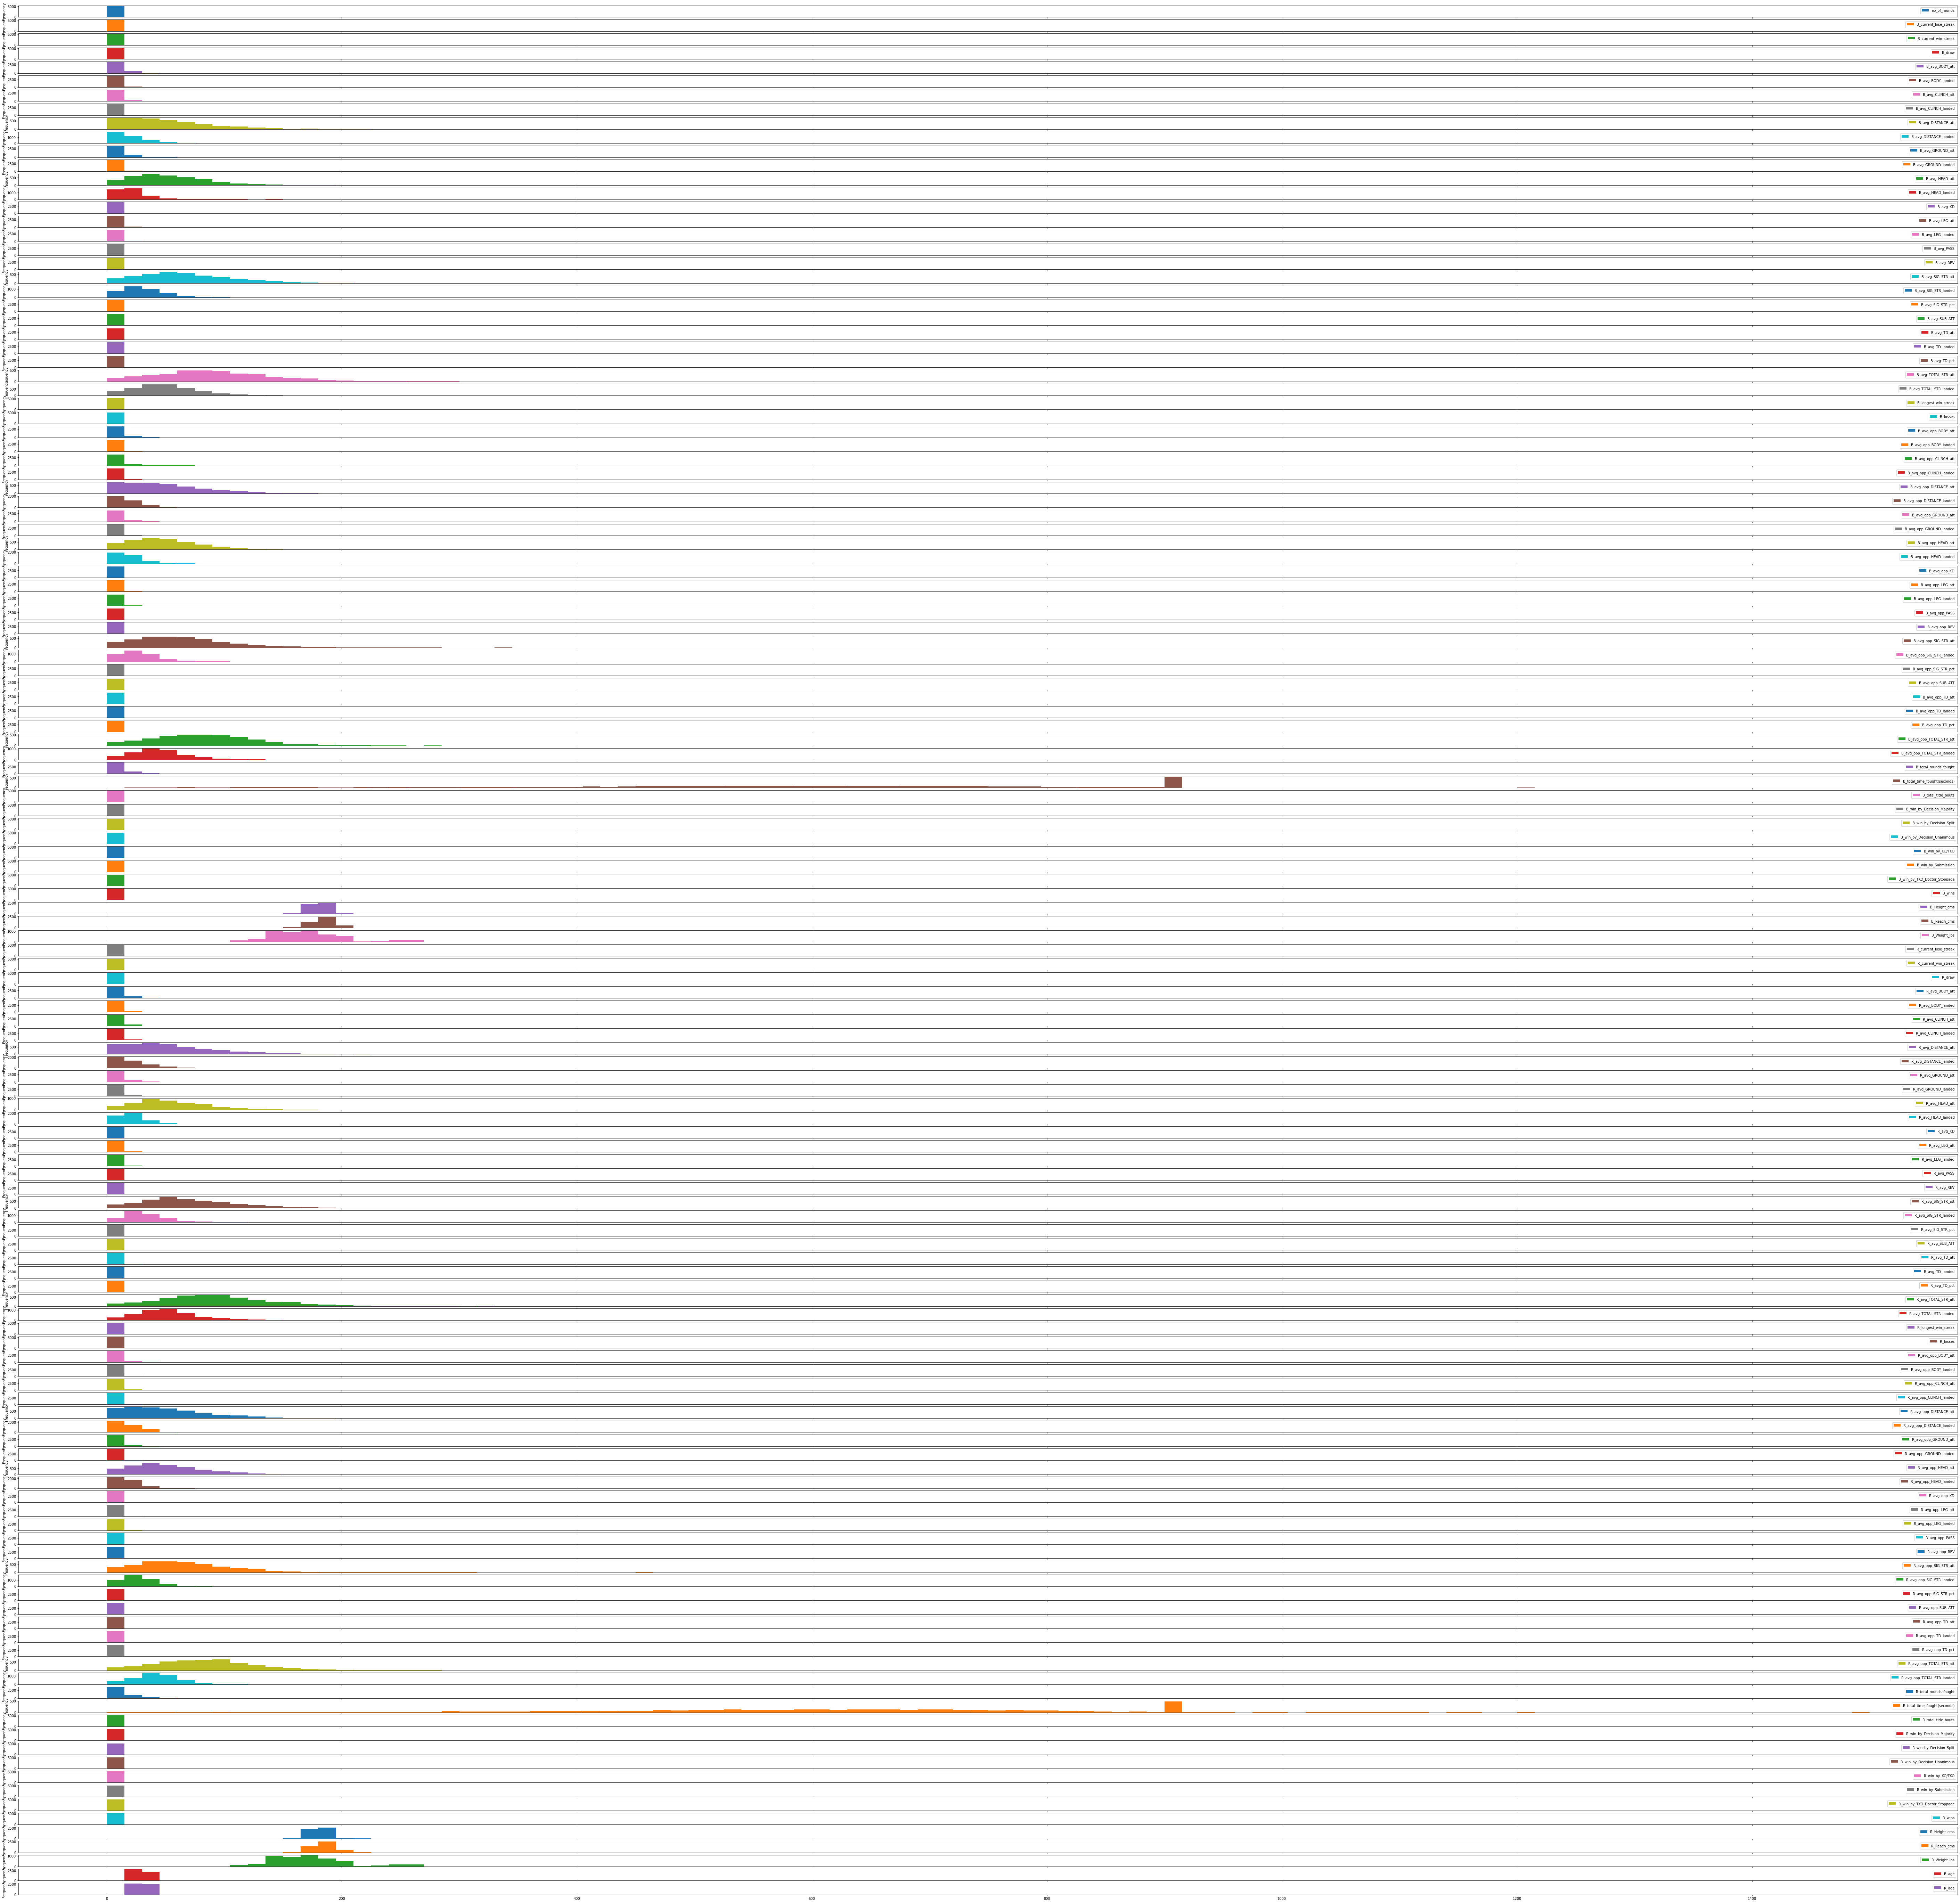

In [0]:
df.select_dtypes(exclude=['object']).plot.hist(subplots=True, layout=(135,1), figsize=(100, 100), bins=100)

Filling null values

In [0]:
df.fillna(method='ffill', inplace=True)
df.isnull().sum()

R_fighter       0
B_fighter       0
Referee         0
date            0
location        0
               ..
R_Height_cms    0
R_Reach_cms     0
R_Weight_lbs    0
B_age           0
R_age           0
Length: 145, dtype: int64

Changing date to number columns

In [0]:
df['date']= pd.to_datetime(df['date'])

df['year'] = [d.year for d in df['date']]
df['month'] = [d.month for d in df['date']]
df['day'] = [d.day for d in df['date']]

In [0]:
df = df.drop('date', 1)
df.head()

,R_fighter,B_fighter,Referee,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_KD,B_avg_LEG_att,B_avg_LEG_landed,B_avg_PASS,B_avg_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_att,B_avg_TD_landed,B_avg_TD_pct,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_longest_win_streak,B_losses,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_opp_KD,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_opp_PASS,B_avg_opp_REV,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_opp_SIG_STR_pct,B_avg_opp_SUB_ATT,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_opp_TD_pct,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_total_rounds_fought,B_total_time_fought(seconds),B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_BODY_att,R_avg_BODY_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_KD,R_avg_LEG_att,R_avg_LEG_landed,R_avg_PASS,R_avg_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_att,R_avg_TD_landed,R_avg_TD_pct,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_longest_win_streak,R_losses,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_opp_KD,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_opp_PASS,R_avg_opp_REV,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_opp_SIG_STR_pct,R_avg_opp_SUB_ATT,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_opp_TD_pct,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_total_rounds_fought,R_total_time_fought(seconds),R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,year,month,day
0,Henry Cejudo,Marlon Moraes,Marc Goddard,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0.0,4.0,0.0,9.200000,6.000000,0.200000,0.000000,62.600000,20.600000,2.600000,2.000000,48.600000,11.200000,0.800000,7.6,5.400000,0.400000,0.000000,65.40,22.600000,0.466000,0.400000,0.80000,0.200000,0.100000,66.400000,23.600000,4.0,1.0,6.400000,4.000000,1.000000,0.60000,51.200000,17.400000,0.600000,0.200000,39.600000,9.400000,0.200000,6.80000,4.800000,0.000000,0.000000,52.800000,18.20000,0.236000,0.000000,1.000000,0.400000,0.100000,53.800000,19.200000,9.0,419.400000,0.0,0.0,1.0,0.0,2.0,1.0,0.0,4.0,Orthodox,167.64,170.18,135.0,0.0,4.0,0.0,21.900000,16.400000,17.000000,11.000000,75.000000,26.500000,9.400000,6.500000,74.200000,23.90,0.400,5.300000,3.700000,1.200000,0.000000,101.400000,44.000000,0.466000,0.100000,5.300000,1.900000,0.458000,129.900000,69.100000,4.0,2.0,13.300000,8.800000,7.500000,5.100000,90.500000,26.800000,0.800000,0.300000,76.100000,17.300000,0.100000,9.400000,6.100000,0.000000,0.000000,98.800000,32.200000,0.336000,0.000000,0.900000,0.100000,0.050000,110.500000,43.300000,27.0,742.60,3.0,0.0,2.0,4.0,2.0,0.0,0.0,8.0,Orthodox,162.56,162.56,135.0,31.0,32.0,2019,6,8
1,Valentina Shevchenko,Jessica Eye,Robert Madrigal,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,0.0,3.0,0.0,14.600000,9.100000,11.800000,7.300000,124.700000,42.100000,2.400000,1.900000,112.000000,32.000000,0.000000,12.

Changing categoric data to value

In [0]:
from sklearn import preprocessing

columns = list(df.select_dtypes(include=['object']).columns)
for column in columns:
  le = preprocessing.LabelEncoder()
  le.fit(df[column])
  df[column] = le.transform(df[column])

df.head()



,R_fighter,B_fighter,Referee,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_KD,B_avg_LEG_att,B_avg_LEG_landed,B_avg_PASS,B_avg_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_att,B_avg_TD_landed,B_avg_TD_pct,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_longest_win_streak,B_losses,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_opp_KD,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_opp_PASS,B_avg_opp_REV,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_opp_SIG_STR_pct,B_avg_opp_SUB_ATT,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_opp_TD_pct,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_total_rounds_fought,B_total_time_fought(seconds),B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_BODY_att,R_avg_BODY_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_KD,R_avg_LEG_att,R_avg_LEG_landed,R_avg_PASS,R_avg_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_att,R_avg_TD_landed,R_avg_TD_pct,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_longest_win_streak,R_losses,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_opp_KD,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_opp_PASS,R_avg_opp_REV,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_opp_SIG_STR_pct,R_avg_opp_SUB_ATT,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_opp_TD_pct,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_total_rounds_fought,R_total_time_fought(seconds),R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,year,month,day
0,473,1129,115,37,2,True,0,5,0.0,4.0,0.0,9.200000,6.000000,0.200000,0.000000,62.600000,20.600000,2.600000,2.000000,48.600000,11.200000,0.800000,7.6,5.400000,0.400000,0.000000,65.40,22.600000,0.466000,0.400000,0.80000,0.200000,0.100000,66.400000,23.600000,4.0,1.0,6.400000,4.000000,1.000000,0.60000,51.200000,17.400000,0.600000,0.200000,39.600000,9.400000,0.200000,6.80000,4.800000,0.000000,0.000000,52.800000,18.20000,0.236000,0.000000,1.000000,0.400000,0.100000,53.800000,19.200000,9.0,419.400000,0.0,0.0,1.0,0.0,2.0,1.0,0.0,4.0,1,167.64,170.18,135.0,0.0,4.0,0.0,21.900000,16.400000,17.000000,11.000000,75.000000,26.500000,9.400000,6.500000,74.200000,23.90,0.400,5.300000,3.700000,1.200000,0.000000,101.400000,44.000000,0.466000,0.100000,5.300000,1.900000,0.458000,129.900000,69.100000,4.0,2.0,13.300000,8.800000,7.500000,5.100000,90.500000,26.800000,0.800000,0.300000,76.100000,17.300000,0.100000,9.400000,6.100000,0.000000,0.000000,98.800000,32.200000,0.336000,0.000000,0.900000,0.100000,0.050000,110.500000,43.300000,27.0,742.60,3.0,0.0,2.0,4.0,2.0,0.0,0.0,8.0,1,162.56,162.56,135.0,31.0,32.0,2019,6,8
1,1273,776,158,37,2,True,12,5,0.0,3.0,0.0,14.600000,9.100000,11.800000,7.300000,124.700000,42.100000,2.400000,1.900000,112.000000,32.000000,0.000000,12.3,10.200000,0.800000,0.000000,138.90,51.300000,0.399000,0.700000,1.00000,0.500000,0.225000,158.700000,69.600000,3.0,6.0,13.000000,9.300000,12.800000,9.

Data normalization to (0;1)

In [0]:
columns = list(df.columns)
for column in columns:
  x = df[[column]].values.astype(float)
  min_max_scaler =  preprocessing.MinMaxScaler()
  x_scaled = min_max_scaler.fit_transform(x)
  df[[column]] = pd.DataFrame(x_scaled)


df.head()


,R_fighter,B_fighter,Referee,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_KD,B_avg_LEG_att,B_avg_LEG_landed,B_avg_PASS,B_avg_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_att,B_avg_TD_landed,B_avg_TD_pct,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_longest_win_streak,B_losses,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_opp_KD,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_opp_PASS,B_avg_opp_REV,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_opp_SIG_STR_pct,B_avg_opp_SUB_ATT,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_opp_TD_pct,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_total_rounds_fought,B_total_time_fought(seconds),B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_BODY_att,R_avg_BODY_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_KD,R_avg_LEG_att,R_avg_LEG_landed,R_avg_PASS,R_avg_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_att,R_avg_TD_landed,R_avg_TD_pct,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_longest_win_streak,R_losses,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_opp_KD,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_opp_PASS,R_avg_opp_REV,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_opp_SIG_STR_pct,R_avg_opp_SUB_ATT,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_opp_TD_pct,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_total_rounds_fought,R_total_time_fought(seconds),R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,year,month,day
0,0.354839,0.636774,0.608466,0.237179,1.0,1.0,0.000000,1.0,0.0,0.307692,0.0,0.187755,0.153846,0.002299,0.000000,0.230996,0.158462,0.029545,0.042553,0.175451,0.081752,0.160000,0.124590,0.114894,0.026667,0.000000,0.218729,0.146753,0.466000,0.050000,0.042105,0.020000,0.100000,0.184444,0.102609,0.2500,0.076923,0.104918,0.083333,0.009524,0.007143,0.141828,0.116000,0.006383,0.002381,0.118209,0.074603,0.066667,0.119298,0.096000,0.000000,0.000000,0.131671,0.090099,0.236000,0.000000,0.050000,0.034783,0.100000,0.133168,0.082759,0.120000,0.276222,0.0000,0.0,0.2,0.0,0.181818,0.090909,0.0,0.173913,0.25,0.260870,0.291667,0.030534,0.000000,0.2500,0.0,0.429412,0.420513,0.207317,0.211538,0.260870,0.202290,0.097917,0.104839,0.281061,0.200840,0.10000,0.084127,0.084091,0.085714,0.000000,0.339698,0.312057,0.466000,0.011111,0.176667,0.172727,0.458000,0.399078,0.341235,0.2500,0.142857,0.177333,0.214634,0.091463,0.100000,0.205682,0.186111,0.007692,0.005660,0.190250,0.131061,0.033333,0.149206,0.148780,0.000000,0.000000,0.217621,0.213245,0.336000,0.000000,0.040909,0.009091,0.050000,0.239696,0.214356,0.3375,0.492699,0.1875,0.0,0.4,0.4,0.181818,0.000000,0.0,0.40,0.25,0.173913,0.166667,0.086957,0.393939,0.464286,1.0,0.454545,0.233333
1,0.954989,0.437676,0.835979,0.237179,1.0,1.0,0.923077,1.0,0.0,0.230769,0.0,0.297959,0.233333,0.135632,0.107353,0.460148,0.323846,0.027273,0.040426,0.404332,0.233577,0.000000,0.201639,

New histograms after normalization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1e61571be0>],
      dtype=object)

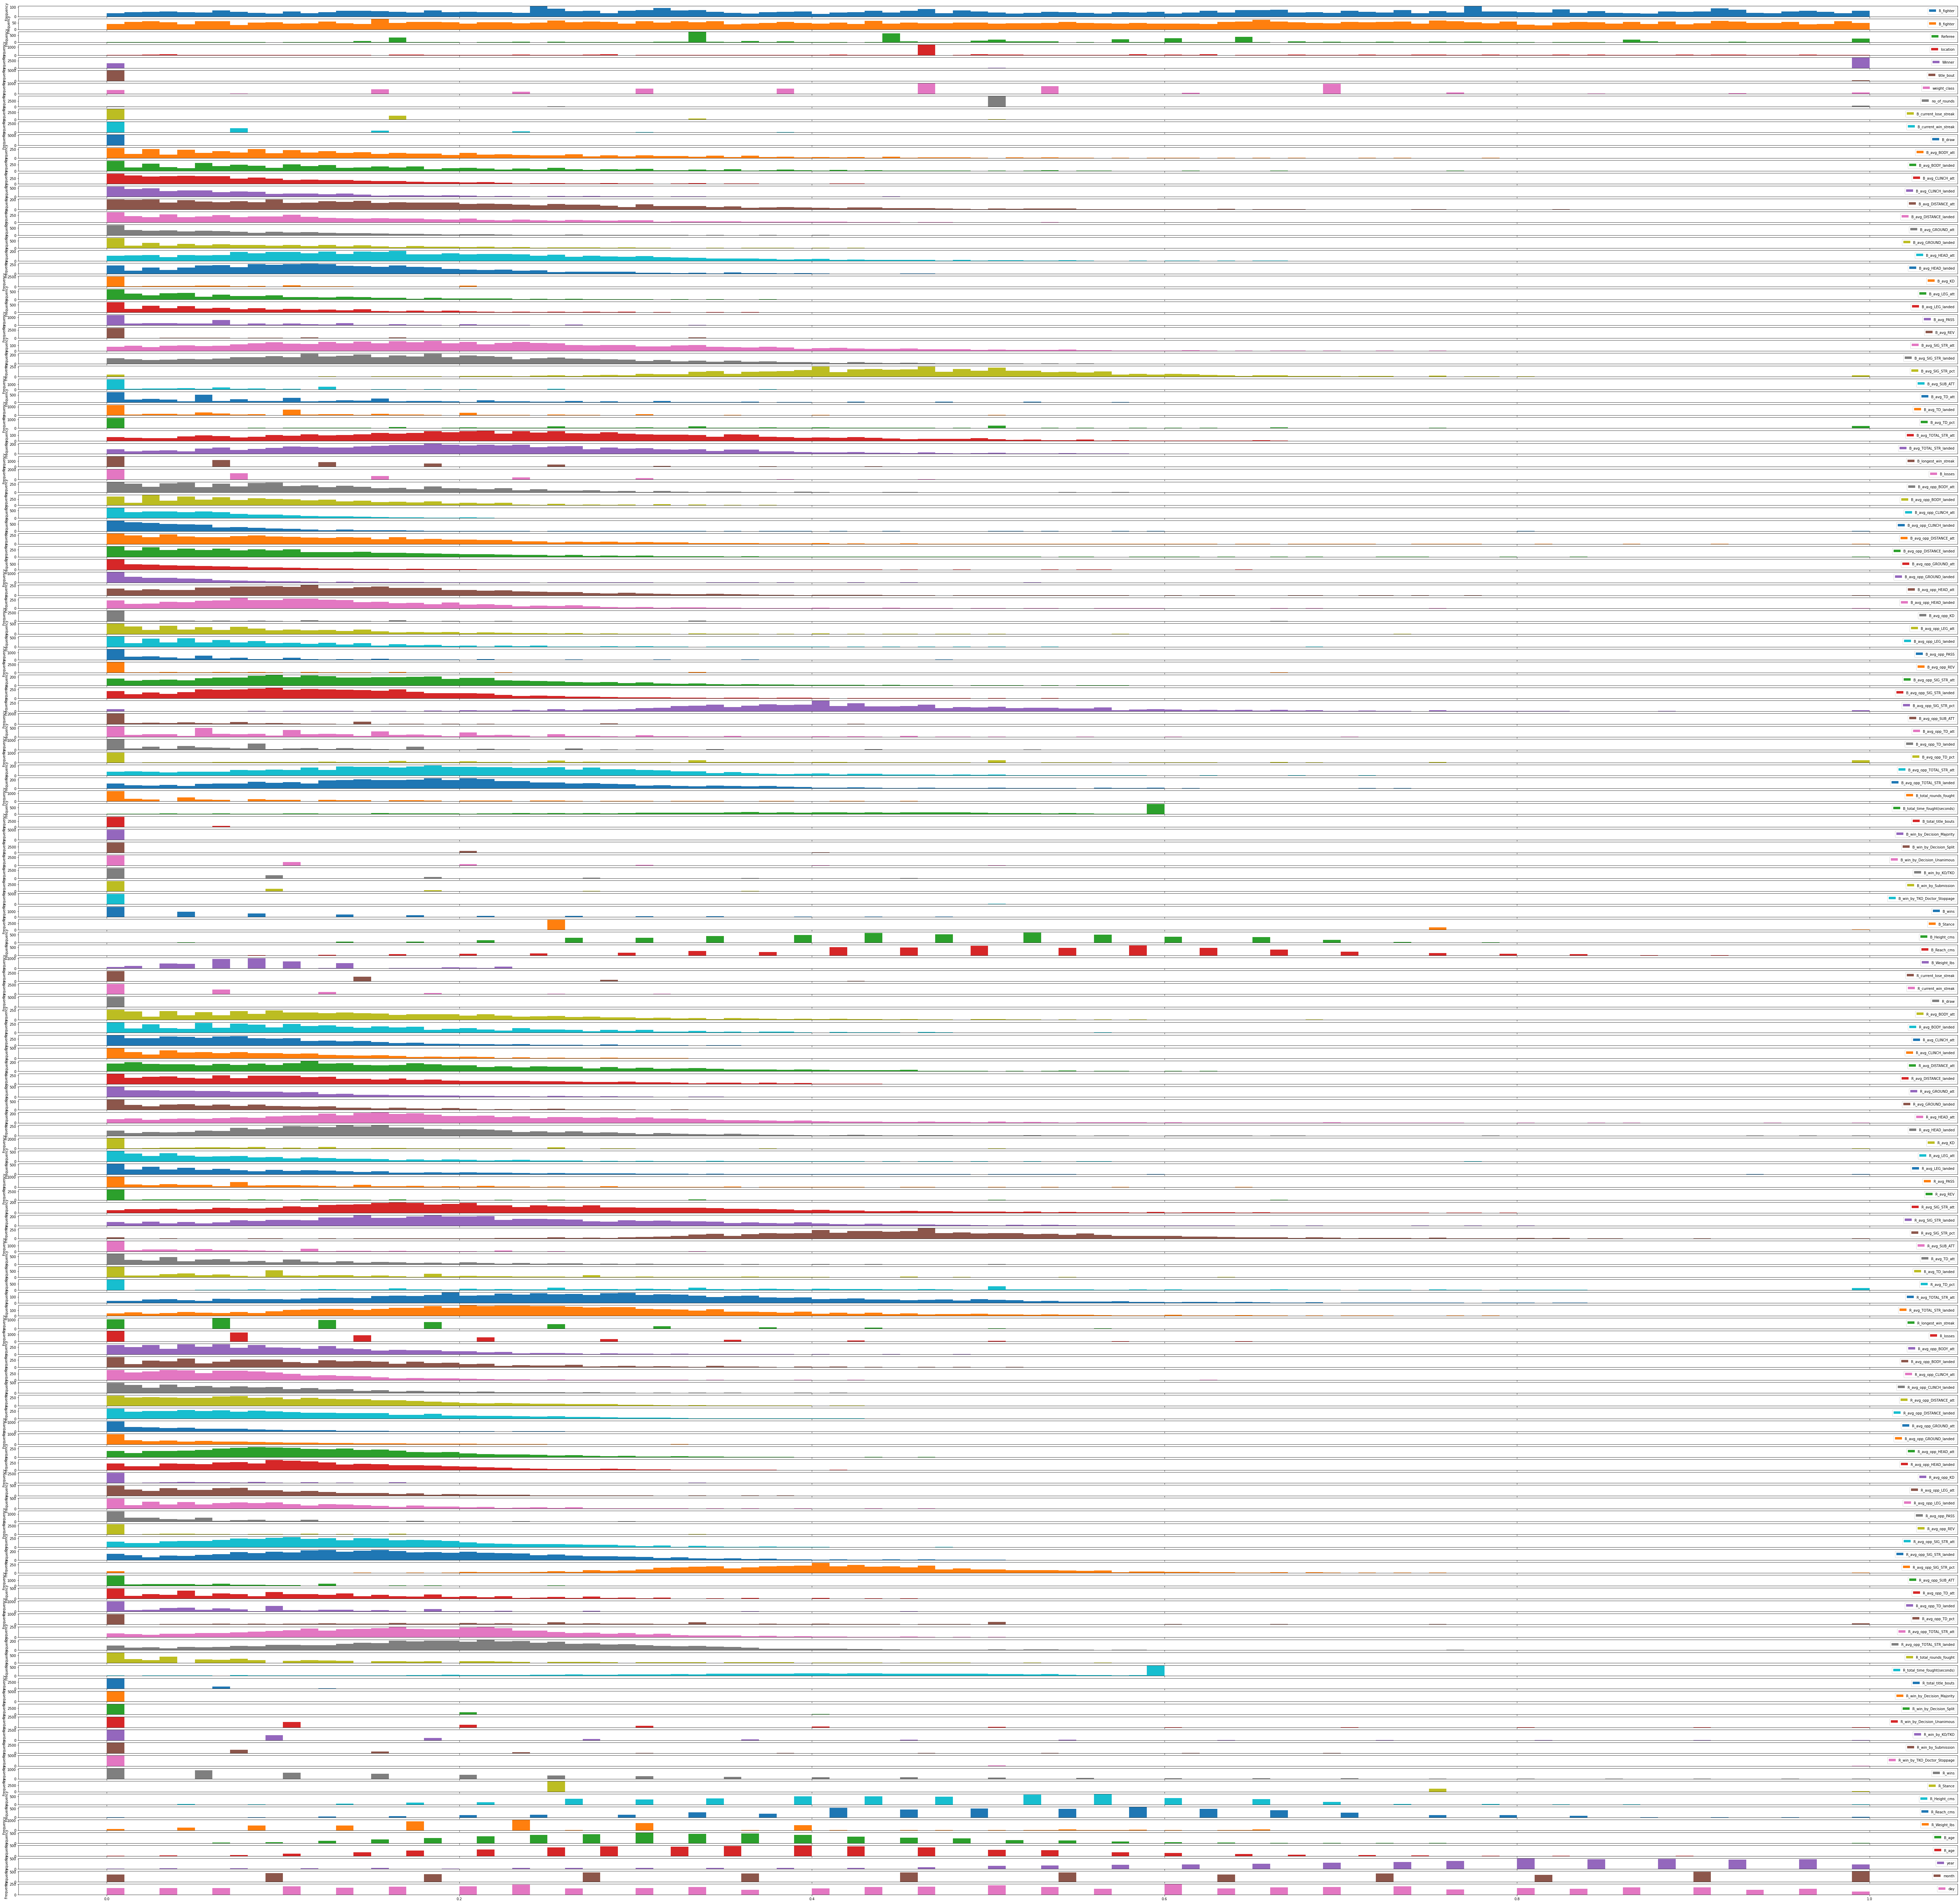

In [0]:
df.plot.hist(subplots=True, layout=(147,1), figsize=(100, 100), bins = 100)


Genetic Algorithm - Feature selection

In [0]:
from sklearn.feature_selection import SelectKBest, f_regression

y = df['Winner']
X = df.drop(columns="Winner")

print(X.shape)
selector = SelectKBest(f_regression ,k=100)
selector = selector.fit(X, y)
cols = selector.get_support(indices=True)
df_new = df.iloc[:,cols]

df_new.info()


(5144, 146)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5144 entries, 0 to 5143
Data columns (total 100 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   B_fighter                     5144 non-null   float64
 1   Referee                       5144 non-null   float64
 2   location                      5144 non-null   float64
 3   Winner                        5144 non-null   float64
 4   B_current_lose_streak         5144 non-null   float64
 5   B_draw                        5144 non-null   float64
 6   B_avg_BODY_att                5144 non-null   float64
 7   B_avg_BODY_landed             5144 non-null   float64
 8   B_avg_CLINCH_att              5144 non-null   float64
 9   B_avg_CLINCH_landed           5144 non-null   float64
 10  B_avg_DISTANCE_att            5144 non-null   float64
 11  B_avg_GROUND_landed           5144 non-null   float64
 12  B_avg_HEAD_att                5144 non-null   flo

/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [0]:
df_new.head()

,B_fighter,Referee,location,Winner,B_current_lose_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_GROUND_landed,B_avg_HEAD_att,B_avg_KD,B_avg_LEG_att,B_avg_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_att,B_avg_TD_pct,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_losses,B_avg_opp_BODY_att,B_avg_opp_CLINCH_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_opp_GROUND_landed,B_avg_opp_HEAD_att,B_avg_opp_KD,B_avg_opp_LEG_att,B_avg_opp_REV,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_opp_SIG_STR_pct,B_avg_opp_SUB_ATT,B_avg_opp_TD_landed,B_avg_opp_TD_pct,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_total_rounds_fought,B_total_time_fought(seconds),B_win_by_Decision_Split,B_Stance,B_Reach_cms,B_Weight_lbs,R_draw,R_avg_BODY_att,R_avg_CLINCH_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_HEAD_att,R_avg_KD,R_avg_LEG_att,R_avg_LEG_landed,R_avg_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_TD_att,R_avg_TD_landed,R_avg_TD_pct,R_avg_TOTAL_STR_att,R_longest_win_streak,R_losses,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_opp_KD,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_opp_REV,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_opp_SUB_ATT,R_avg_opp_TD_att,R_avg_opp_TD_pct,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_total_rounds_fought,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,0.636774,0.608466,0.237179,1.0,0.0,0.0,0.187755,0.153846,0.002299,0.000000,0.230996,0.042553,0.175451,0.160000,0.124590,0.000000,0.218729,0.466000,0.050000,0.042105,0.100000,0.184444,0.102609,0.076923,0.104918,0.007143,0.141828,0.116000,0.002381,0.118209,0.066667,0.119298,0.000000,0.131671,0.090099,0.236000,0.000000,0.034783,0.100000,0.133168,0.082759,0.120000,0.276222,0.2,0.25,0.291667,0.030534,0.0,0.429412,0.211538,0.260870,0.202290,0.097917,0.104839,0.281061,0.10000,0.084127,0.084091,0.000000,0.339698,0.312057,0.466000,0.176667,0.172727,0.458000,0.399078,0.2500,0.142857,0.177333,0.214634,0.091463,0.100000,0.205682,0.186111,0.007692,0.005660,0.190250,0.131061,0.033333,0.149206,0.148780,0.000000,0.217621,0.213245,0.000000,0.040909,0.050000,0.239696,0.214356,0.3375,0.0,0.4,0.4,0.0,0.25,0.173913,0.166667,0.086957,0.393939,0.464286
1,0.437676,0.835979,0.237179,1.0,0.0,0.0,0.297959,0.233333,0.135632,0.107353,0.460148,0.040426,0.404332,0.000000,0.201639,0.000000,0.464548,0.399000,0.087500,0.052632,0.225000,0.440833,0.302609,0.461538,0.213115,0.114286,0.281717,0.213333,0.082143,0.291642,0.033333,0.208772,0.000000,0.305736,0.240099,0.408000,0.100000,0.078261,0.231000,0.375000,0.325000,0.386667,0.563965,0.4,0.25,0.250000,0.015267,0.0,0.235294,0.131868,0.306584,0.275900,0.191964,0.264977,0.320346,0.00000,0.306122,0.334416,0.047619,0.388131,0.421479,0.575714,0.171429,0.220779,0.601429,0.496379,0.1250,0.142857,0.327619,0.344948,0.128920,0.154062,0.224026,0.226190,0.061813,0.080863,0.154643,0.094156,0.000000,0.462585,0.442509,0.000000,0.254563,0.296121,0.035714,0.149351,0.147143,0.343043,0.407355,0.3125,0.0,0.2,0.2,0.0,0.75,0.217391,0.250000,0.043478,0.424242,0.428571
2,0.266215,0.164021,0.237179,1.0,0.0,0.0,0.313364,0.290323,0.077494,0.064516,0.312701,0.080988,0.244206,0.129032,0.229508,0.032258,0.324415,0.496129,0.044355,0.113752,0.295484,0.288082,0.228471,0.615385,0.293496,0.069508,0.234206,0.253763,0.011137,0.201926,0.075269,0.160724,0.010753,0.236184,0.221974,0.453226,0.013825,0.019635,0.063548,0.248483,0.214544,0.906667,0.385044,0.0,0.25,0.541667,0.061069,0.0,0.271895,0.033333,0.403942,0.377608,0.055556,0.068817,0.366414,0.05000,0.217989,0.254545,0.044444,0.416527,0.393381,0.430000,0.031111,

Column reduction using PCA

In [0]:
from sklearn.decomposition import PCA
pca = PCA(.97)
df_new_components = pca.fit_transform(df)

pcaDf = pd.DataFrame(data = df_new_components)
pcaDf.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73
0,0.304605,0.082673,0.846369,0.455845,0.110666,0.139915,0.361384,0.441972,0.083105,-0.056476,-0.292204,-0.057105,0.952123,0.352284,0.127324,0.099745,0.128288,-0.350581,-0.016449,-0.129285,-0.083821,0.165360,-0.033463,0.215154,0.037394,-0.186628,0.078511,-0.011169,-0.107314,-0.232573,0.075707,0.017482,-0.177133,-0.006086,0.000225,0.145860,-0.063773,-0.170158,-0.131848,0.020192,-0.011200,-0.013056,-0.032527,-0.030119,0.194715,0.031538,0.051284,-0.008188,0.026763,-0.082368,0.065822,0.037949,0.078300,-0.073882,-0.060660,0.087245,0.026834,0.026369,-0.191137,0.033274,-0.021552,0.002168,-0.005267,0.090006,-0.035182,-0.020581,0.044893,-0.059566,0.024801,0.100168,-0.005624,-0.058889,-0.043093,-0.045894
1,0.982438,0.622178,0.802541,0.084073,0.162211,0.179906,0.557571,-0.056673,0.205844,0.427596,-0.207093,0.274724,0.303580,0.454504,0.206106,0.212120,0.436986,0.482678,-0.375443,-0.172184,-0.297396,0.262184,0.002164,0.002845,-0.027951,-0.157722,0.011870,-0.023577,0.047479,-0.187693,0.066427,0.115893,-0.046424,0.014439,-0.094271,-0.073518,0.029107,0.047308,0.106574,0.079290,0.050470,-0.135723,-0.078794,-0.379109,-0.176440,-0.145978,0.014089,0.266785,0.317930,0.115395,-0.028130,-0.040389,0.247007,-0.039953,-0.048326,0.153644,-0.105794,0.059061,-0.106023,-0.085131,-0.043291,-0.142434,-0.114463,0.005228,-0.012271,-0.156979,0.060629,-0.067477,0.094614,0.149585,0.015984,0.047387,0.036454,-0.032763
2,0.736944,-0.410173,1.535485,-0.156344,-0.494887,-0.163398,-0.127444,-0.241977,0.173414,0.333689,-0.374697,-0.036354,0.206595,0.028489,-0.225066,-0.800871,-0.047205,0.505386,-0.175463,0.098517,0.207754,-0.211030,0.102382,-0.220717,-0.091549,0.011622,0.112183,0.126798,-0.339345,0.318169,-0.005295,0.173106,0.189917,0.293336,-0.244591,0.118365,0.315513,-0.028590,-0.159326,0.153301,-0.045126,0.025842,0.008162,-0.010567,0.101145,0.090204,-0.051777,-0.325355,-0.272134,0.231655,0.068718,-0.084573,-0.156720,0.332202,-0.012729,-0.048261,0.137475,-0.014802,0.152334,0.124562,-0.033736,-0.210036,0.095696,-0.066397,0.052907,-0.070327,0.006850,0.065694,0.048217,-0.135714,-0.115684,0.129721,-0.013592,-0.024863
3,1.159226,-0.299251,-0.093431,0.015279,0.167603,-0.049149,-0.015602,0.242710,-0.255145,-0.064710,-0.420702,-0.237770,0.427761,-0.040757,-0.416995,0.132763,0.116821,0.028307,0.563860,0.155359,0.411411,0.085138,0.014360,0.163467,0.069110,0.043505,0.019227,0.003170,-0.077384,-0.101277,0.145425,-0.082849,0.080717,0.073747,-0.060691,0.004812,-0.040778,-0.020271,0.035058,-0.124631,-0.019083,-0.073029,-0.031752,-0.055621,-0.056693,-0.012494,0.016782,-0.080260,0.057141,-0.176418,0.005194,-0.044678,-0.122886,-0.054145,-0.011160,0.002755,0.173178,0.034119,0.083209,0.055480,0.117146,-0.004061,-0.011674,0.140118,0.067387,-0.048879,0.047795,0.009837,-0.037582,0.011853,-0.005743,-0.003854,0.010367,-0.074334
4,1.034290,-0.117950,-0.471466,-1.075156,-0.347179,-0.039889,-0.182231,0.373557,0.315070,0.755142,-0.296023,-0.334725,0.093520,0.169602,-0.326672,0.305439,-0.056470,0.239519,0.073854,0.520331,-0.243868,-0.259180,0.120456,0.147573,-0.039364,0.216151,0.007664,0.051749,0.029949,0.039264,0.072427,-0.196774,0.083583,0.063097,-0.016516,-0.000254,0.046757,0.054098,-0.056734,-0.164366,0.046082,0.012945,0.172051,-0.051050,0.097641,0.108830,-0.082295,0.051362,0.172051,-0.102657,0.080810,0.046318,-0.006915,0.029720,0.056158,0.013610,0.100236,-0.275523,0.181473,-0.032488,-0.075982,-0.031679,0.001601,-0.014501,-0.231494,-0.104396,0.144668,0.008629,-0.111394,0.086237,-0.082610,-0.019623,-0.077679,0.055631


Cross-validation for 10 element groups. 9 - train, 1 - validation.



In [0]:
from sklearn.model_selection import train_test_split, cross_validate
X_train, X_test, y_train, y_test = train_test_split(pcaDf, y, test_size = 0.1, random_state = 42)

Changing data from contiunos, to int (as 0 or 1)

In [0]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

#SVC
Training and prediction

In [0]:
from sklearn import svm
clv = svm.NuSVC()

In [0]:
clv.fit(X_train, y_train )
pred_clv = clv.predict(X_test)

Cross validation

In [0]:
scores = cross_validate(clv, X_train, y_train, cv=10, scoring='f1_macro')

In [0]:
print(scores)

{'fit_time': array([1.56635976, 1.56370449, 1.54121375, 1.55181193, 1.55032325,
       1.55547857, 1.57841659, 1.59049177, 1.57887125, 1.56287169]), 'score_time': array([0.10815144, 0.10767221, 0.10776353, 0.10787344, 0.10775542,
       0.10886097, 0.10840559, 0.11029482, 0.1107986 , 0.10679364]), 'test_score': array([0.94880584, 0.96717977, 0.97489699, 0.98258884, 0.95952797,
       0.96472266, 0.96730457, 0.97753263, 0.97753263, 0.96714783])}


Metrics

In [0]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [0]:
print(classification_report(y_test, pred_clv))
print(confusion_matrix(y_test, pred_clv))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95       168
           1       0.96      1.00      0.98       347

    accuracy                           0.97       515
   macro avg       0.98      0.96      0.97       515
weighted avg       0.97      0.97      0.97       515

[[153  15]
 [  0 347]]


#Neural Network

In [0]:
from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier(hidden_layer_sizes=(11, 11, 11), max_iter = 500)

In [0]:
mlpc.fit(X_train, y_train)
mlpc_predict = mlpc.predict(X_test)

In [0]:
print(classification_report(y_test, mlpc_predict))
print(confusion_matrix(y_test, mlpc_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       168
           1       1.00      1.00      1.00       347

    accuracy                           1.00       515
   macro avg       1.00      1.00      1.00       515
weighted avg       1.00      1.00      1.00       515

[[168   0]
 [  0 347]]


#PNN

In [0]:
from neupy import algorithms
pnn = algorithms.PNN(std=10, verbose=False)
pnn.train(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

In [0]:
pnn_pred = pnn.predict(X_test)

In [0]:
print(classification_report(y_test, pnn_pred))
print(confusion_matrix(y_test, mlpc_predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       168
           1       1.00      1.00      1.00       347

    accuracy                           1.00       515
   macro avg       1.00      1.00      1.00       515
weighted avg       1.00      1.00      1.00       515

[[168   0]
 [  0 347]]


#Parameters optimization
##PSO 

In [0]:
!pip install pyswarm
from pyswarm import pso
from sklearn.metrics import f1_score

In [0]:
def mlpc_for_pso(param):
  param = param.astype(int)
  hidden_layer_num = param[0]
  hidden_layer_sizes = param[1::]
  hidden_layers = hidden_layer_sizes[0:hidden_layer_num]
  mlpc = MLPClassifier(hidden_layer_sizes=tuple(hidden_layers), max_iter = 500)
  mlpc.fit(X_train, y_train)
  mlpc_predict = mlpc.predict(X_test)
  return abs(f1_score(y_test, mlpc_predict, average="micro")-1) 

xopt, fopt = pso(mlpc_for_pso, [1,1,1,1,1,1], [4,15,15,15,15,15], f_ieqcons=None, maxiter=1)
print(xopt.astype(int))
print(fopt)

Stopping search: maximum iterations reached --> 1
[ 3.63372804 12.26720513 14.24902014  9.91808629 13.00409059 11.06390465]
0.0


In [0]:
param = xopt.astype(int)
hidden_layer_num = param[0]
hidden_layer_sizes = param[1::]
hidden_layers = hidden_layer_sizes[0:hidden_layer_num]
mlpc = MLPClassifier(hidden_layer_sizes=tuple(hidden_layers), max_iter = 500)
mlpc.fit(X_train, y_train)
mlpc_predict = mlpc.predict(X_test)
print(classification_report(y_test, pnn_pred))
print(confusion_matrix(y_test, mlpc_predict))

[12 14  9]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       168
           1       1.00      1.00      1.00       347

    accuracy                           1.00       515
   macro avg       1.00      1.00      1.00       515
weighted avg       1.00      1.00      1.00       515

[[168   0]
 [  0 347]]
